<a href="https://colab.research.google.com/github/tamayodb/CCDATSCL_EXERCISES_COM222/blob/main/Exercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1

In this activity, you will work with the New York City Airbnb Open Data—a popular, messy, and highly realistic dataset used by data analysts and data scientists around the world. The dataset includes thousands of Airbnb listings along with details about hosts, locations, prices, reviews, and more.

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR8Pmq3Gv7y7z_2Xun-OqMIk43kd5u0TXEatw&s"/>


To guide your work, you will follow the 6-Step Data Wrangling Process, a professional workflow used in industry:

- Discovering. Become familiar with the data by exploring its structure and observing patterns.

- Structuring. Fix issues related to format, column types, indices, and duplicated records.

- Cleaning. Handle missing values, outliers, and inconsistencies so the dataset becomes trustworthy.

- Enriching. Add new features, aggregate information, and enhance the dataset for deeper insights.

- Validating. Apply rule-based checks to ensure the data meets quality standards.

- Publishing. Export and prepare the cleaned dataset for downstream analysis or reporting.
Throughout this exercise, you will answer questions and fill in code cells based on these six steps. You will mimic what professional data scientists do when preparing data for business intelligence dashboards, machine learning models, or exploratory analysis.

In [1]:
import kagglehub
import os
import pandas as pd
import numpy as np

# Download latest version
path = kagglehub.dataset_download("dgomonov/new-york-city-airbnb-open-data")

print("Path to dataset files:", path)

if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)

Using Colab cache for faster access to the 'new-york-city-airbnb-open-data' dataset.
Path to dataset files: /kaggle/input/new-york-city-airbnb-open-data
True


## A. Discovering


Display the first 10 rows

In [2]:
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


Display the column names:

In [3]:
df.columns, df.columns.values

(Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
        'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
        'minimum_nights', 'number_of_reviews', 'last_review',
        'reviews_per_month', 'calculated_host_listings_count',
        'availability_365'],
       dtype='object'),
 array(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
        'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
        'minimum_nights', 'number_of_reviews', 'last_review',
        'reviews_per_month', 'calculated_host_listings_count',
        'availability_365'], dtype=object))

Display the dataframe shape:

In [4]:
df.shape

(48895, 16)

Identify the numerical features:

In [5]:
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
print("Numerical features:", numerical_features)

Numerical features: ['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


Identify the categorical features

In [6]:
categorical_features = df.select_dtypes(exclude=np.number).columns.tolist()
print("Categorical features:", categorical_features)

Categorical features: ['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'last_review']


What are the top 5 questions this dataset might help answer?





1.   What makes some Airbnb listings more expensive than others? (Location, room type, reviews?)
2.   Do listings with many reviews tend to be better or cost more?
3. Are properties with higher availability (availability_365) generally priced lower?
4. Are certain neighborhoods dominated by one room type?
5. Which factors (neighborhood, room type, minimum nights) significantly influence Airbnb prices in NYC?



## B. Structuring

Check if the dataset has proper column types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Check if the dataset has index issues

In [13]:
print('Unique index: ', df.index.is_unique)
print('Default RangeIndex: ', isinstance(df.index, pd.RangeIndex))

Unique index:  True
Default RangeIndex:  True


Check if the dataset has duplicated rows

In [16]:
df.duplicated().sum()

np.int64(0)

Convert columns to correct types (e.g., dates → datetime).

In [17]:
df['last_review'] = pd.to_datetime(df['last_review'])

Identify at least one structural issue and describe how to fix it.

The neighbourhood_group, neighbourhood, and room_type columns are currently stored as object (string) data types. Given that these columns contain a limited number of unique values (neighbourhood_group has 5 unique values, room_type has 3 unique values, and neighbourhood also has a fixed but larger, set of unique values), converting them to the category data type will improve operations like filtering and sorting them.

In [27]:
df['neighbourhood_group'] = df['neighbourhood_group'].astype('category')
df['neighbourhood'] = df['neighbourhood'].astype('category')
df['room_type'] = df['room_type'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48884 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48884 non-null  int64         
 1   name                            48884 non-null  object        
 2   host_id                         48884 non-null  int64         
 3   host_name                       48884 non-null  object        
 4   neighbourhood_group             48884 non-null  category      
 5   neighbourhood                   48884 non-null  category      
 6   latitude                        48884 non-null  float64       
 7   longitude                       48884 non-null  float64       
 8   room_type                       48884 non-null  category      
 9   price                           48884 non-null  int64         
 10  minimum_nights                  48884 non-null  float64       
 11  number_

## C. Cleaning



Check for missing values

In [15]:
df.isnull().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


Check for outliers in `minimum_nights`

In [20]:
df['minimum_nights'].describe()

,minimum_nights
count,48895.000000
mean,7.029962
std,20.510550
min,1.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,1250.000000


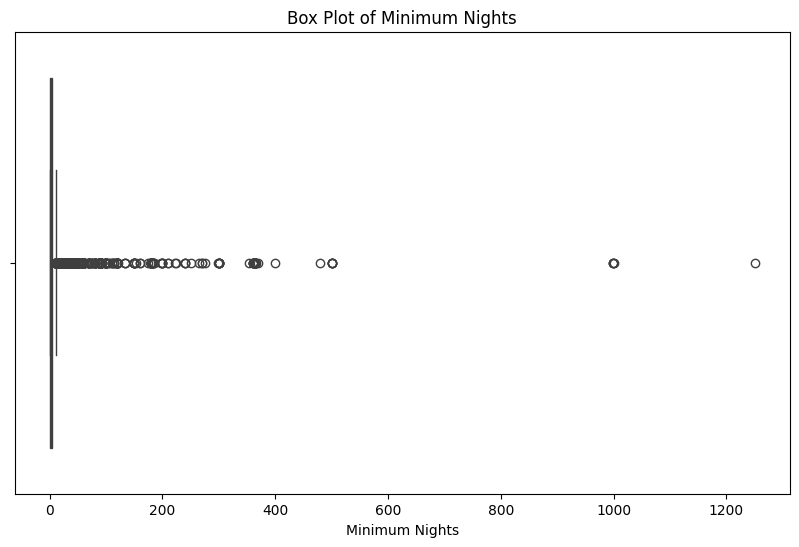

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['minimum_nights'])
plt.title('Box Plot of Minimum Nights')
plt.xlabel('Minimum Nights')
plt.show()


The minimum_nights column has a wide range, from a minimum of 1 night to  a maximum of 1250 nights. The maximum value of 1250 nights is a clear outlier, suggesting that there are listings with exceptionally long minimum stay requirements, which could potentially be data entry error or specific long-term rental arrangements.



Check for invalid values (e.g., price ≤ 0)

In [22]:
print('Number of entries with price <= 0:', df[df['price'] <= 0].shape[0])

Number of entries with price <= 0: 11


Apply a missing-value strategy (drop, fill, or flag)


In [23]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
df['name'] = df['name'].fillna('Unknown Name')
df['host_name'] = df['host_name'].fillna('Unknown Host')
print("Missing values after strategy:")
print(df.isnull().sum())

Missing values after strategy:
id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64


Apply an outlier-handling strategy

In [25]:
df = df[df['price'] > 0]

min_nights_99th_percentile = df['minimum_nights'].quantile(0.99)
df['minimum_nights'] = np.where(df['minimum_nights'] > min_nights_99th_percentile,
                                df['minimum_nights'].quantile(0.99),
                                df['minimum_nights'])

print(f"Removed {48895 - df.shape[0]} rows with price <= 0.")
print(f"Minimum nights capped at {min_nights_99th_percentile:.0f} (99th percentile).")
print(f"Descriptive statistics after removing outlier for minimum_nights: ")
print(df['minimum_nights'].describe())

Removed 11 rows with price <= 0.
Minimum nights capped at 45 (99th percentile).
Descriptive statistic after removing outlier for minimum_nights: 
count    48884.000000
mean         6.116480
std          9.244575
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max         45.000000
Name: minimum_nights, dtype: float64


1. A price of zero or less for an Airbnb listing is considered invalid data. These rows were removed because they do not represent legitimate listings and could skew any price-related analysis.

2. During the discovery phase, we observed that the *minimum_nights* column had extreme outliers (up to 1250 nights). While some very long-term rentals might exist, such extreme values are often data entry errors or represent a very niche segment that could disproportionately influence our analysis. By capping these values at the 99th percentile, we reduce the impact of these extreme outliers, making the distribution more manageable and representative for most analyses without losing too much data.



## D. Enriching

Create at least 3 new variables:
- price_per_minimum_night
- review_rate_per_month (combine ratings + frequency)
- is_expensive (boolean flag based on price threshold)


In [28]:
print(df['price'].quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99]))

0.25     69.0
0.50    106.0
0.75    175.0
0.90    269.0
0.95    355.0
0.99    799.0
Name: price, dtype: float64


In [29]:
df['price_per_minimum_night'] = df['price'] / df['minimum_nights']
df['review_rate_per_month'] = df['number_of_reviews'] * df['reviews_per_month']

price_threshold = df['price'].quantile(0.75)
df['is_expensive'] = (df['price'] > price_threshold)

display(df.head())

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_per_minimum_night,review_rate_per_month,is_expensive
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1.0,9,2018-10-19,0.21,6,365,149.0,1.89,False
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1.0,45,2019-05-21,0.38,2,355,225.0,17.10,True
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3.0,0,NaT,0.00,1,365,50.0,0.00,False
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1.0,270,2019-07-05,4.64,1,194,89.0,1252.80,False
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10.0,9,2018-11-19,0.10,1,0,8.0,0.90,False


Create 1 aggregated summary table

(e.g. average price per neighborhood number of hosts per borough)

**Average Price by Neighbourhood Group and Room Type**

In [31]:
average_price_by_location_room = df.groupby(['neighbourhood_group', 'room_type'])['price'].mean().reset_index()
print("Average Price by Neighbourhood Group and Room Type:")
display(average_price_by_location_room)

Average Price by Neighbourhood Group and Room Type:


/tmp/ipython-input-3920792967.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_price_by_location_room = df.groupby(['neighbourhood_group', 'room_type'])['price'].mean().reset_index()


,neighbourhood_group,room_type,price
0,Bronx,Entire home/apt,127.506596
1,Bronx,Private room,66.890937
2,Bronx,Shared room,59.800000
3,Brooklyn,Entire home/apt,178.346202
4,Brooklyn,Private room,76.545428
5,Brooklyn,Shared room,50.773723
6,Manhattan,Entire home/apt,249.257994
7,Manhattan,Private room,116.776622
8,Manhattan,Shared room,88.977083
9,Queens,Entire home/apt,147.050573


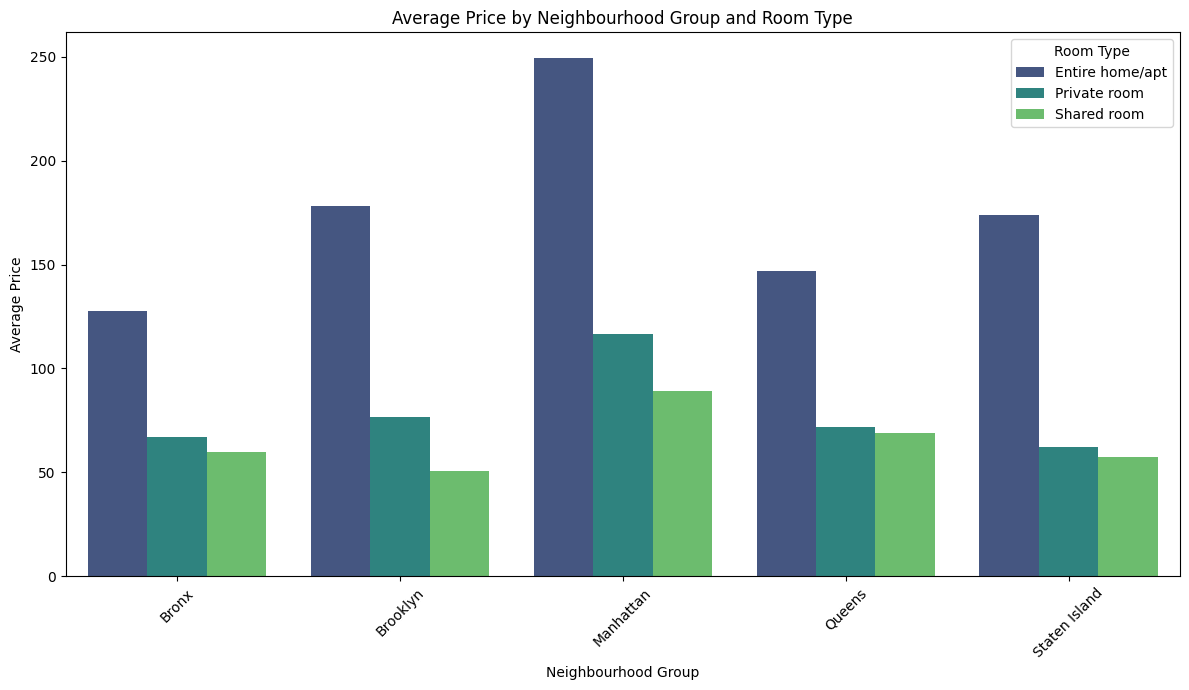

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))
sns.barplot(x='neighbourhood_group', y='price', hue='room_type', data=average_price_by_location_room, palette='viridis')
plt.title('Average Price by Neighbourhood Group and Room Type')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.legend(title='Room Type')
plt.tight_layout()
plt.show()

## E. Validating

Create at least 3 validation checks
- Price must be positive.
- Host ID should not be null.
- Minimum nights must be ≥ 1.
- Generate a validation report:
- Count of rows violating each rule.

Decide if invalid rows (if any) should be removed or corrected?

In [34]:
price_violations = df[df['price'] <= 0].shape[0]
minimum_nights_violations = df[df['minimum_nights'] < 1].shape[0]

print(f"Number of rows with price less than or equal to 0: {price_violations}")
print(f"Number of rows with minimum_nights less than 1: {minimum_nights_violations}")

Number of rows with price less than or equal to 0: 0
Number of rows with minimum_nights less than 1: 0


In [35]:
host_id_violations = df['host_id'].isnull().sum()
print(f"Number of null values in host_id: {host_id_violations}")

Number of null values in host_id: 0


In [36]:
print("--- Validation Report ---")
print(f"Price <= 0 violations: {price_violations}")
print(f"Minimum nights < 1 violations: {minimum_nights_violations}")
print(f"Null host_id violations: {host_id_violations}")
print("-------------------------")

--- Validation Report ---
Price <= 0 violations: 0
Minimum nights < 1 violations: 0
Null host_id violations: 0
-------------------------


## F. Publishing

Select final columns for publication.



In [40]:
final_columns = [
    'id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
    'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews',
    'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365',
    'price_per_minimum_night', 'review_rate_per_month', 'is_expensive'
]

df_published = df[final_columns]
print("Selected columns for publication:")
display(df_published.head())

Selected columns for publication:


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_per_minimum_night,review_rate_per_month,is_expensive
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1.0,9,2018-10-19,0.21,6,365,149.0,1.89,False
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1.0,45,2019-05-21,0.38,2,355,225.0,17.10,True
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3.0,0,NaT,0.00,1,365,50.0,0.00,False
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1.0,270,2019-07-05,4.64,1,194,89.0,1252.80,False
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10.0,9,2018-11-19,0.10,1,0,8.0,0.90,False


In [41]:
df.shape

(48884, 19)

Export cleaned dataset as "cleaned_airbnb.csv"

In [42]:
df_published.to_csv('cleaned_airbnb.csv', index=False)
print("Cleaned dataset exported to 'cleaned_airbnb.csv'")

Cleaned dataset exported to 'cleaned_airbnb.csv'


In [43]:
df_published.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48884 entries, 0 to 48894
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48884 non-null  int64         
 1   name                            48884 non-null  object        
 2   host_id                         48884 non-null  int64         
 3   host_name                       48884 non-null  object        
 4   neighbourhood_group             48884 non-null  category      
 5   neighbourhood                   48884 non-null  category      
 6   latitude                        48884 non-null  float64       
 7   longitude                       48884 non-null  float64       
 8   room_type                       48884 non-null  category      
 9   price                           48884 non-null  int64         
 10  minimum_nights                  48884 non-null  float64       
 11  number_

Export summary reports (e.g., validation or aggregations) as CSV.

In [44]:
average_price_by_location_room.to_csv('average_price_by_location_room.csv', index=False)
print("Aggregated summary 'average_price_by_location_room.csv' exported.")

Aggregated summary 'average_price_by_location_room.csv' exported.


In [47]:
df_average_price = pd.read_csv('average_price_by_location_room.csv')
df_average_price.head()

,neighbourhood_group,room_type,price
0,Bronx,Entire home/apt,127.506596
1,Bronx,Private room,66.890937
2,Bronx,Shared room,59.800000
3,Brooklyn,Entire home/apt,178.346202
4,Brooklyn,Private room,76.545428
